In [71]:
%pwd
%cd ..
%cd ultralytics

/home/areebadnan/Areeb_code/work/Atheritia
/home/areebadnan/Areeb_code/work/Atheritia/ultralytics


/home/areebadnan/Areeb_Python_Environments/yolo_env1/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [72]:
from ultralytics import YOLO
import torch
import copy


# Initialize pretrained model
#model = YOLO('yolov8n.pt')

model_yaml = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/ultralytics/cfg/models/v8/yolov8l-test.yaml", task= "detect")

# Keep a copy of old state dict for sanity check
old_dict = copy.deepcopy(model_yaml.state_dict())

# We should freeze all but the last layer
model_yaml.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [3]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [63]:
model_2 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/17logos_head_17logosbase_L/train/weights/best.pt") # 22 layers
model_1 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/47_(10)_logos_head_17logosbase_L_3/train/weights/best.pt") # 14 layers 

In [70]:
model_2

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=False)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=False)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=False)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, trac

In [65]:
total_params  = sum(p.numel() for p in model_2.parameters() if p.requires_grad)
print (total_params)


0


In [64]:
for name, param in model_2.named_parameters():
    #if param.requires_grad:
        print (name,param.requires_grad)

model.model.0.conv.weight False
model.model.0.bn.weight False
model.model.0.bn.bias False
model.model.1.conv.weight False
model.model.1.bn.weight False
model.model.1.bn.bias False
model.model.2.cv1.conv.weight False
model.model.2.cv1.bn.weight False
model.model.2.cv1.bn.bias False
model.model.2.cv2.conv.weight False
model.model.2.cv2.bn.weight False
model.model.2.cv2.bn.bias False
model.model.2.m.0.cv1.conv.weight False
model.model.2.m.0.cv1.bn.weight False
model.model.2.m.0.cv1.bn.bias False
model.model.2.m.0.cv2.conv.weight False
model.model.2.m.0.cv2.bn.weight False
model.model.2.m.0.cv2.bn.bias False
model.model.2.m.1.cv1.conv.weight False
model.model.2.m.1.cv1.bn.weight False
model.model.2.m.1.cv1.bn.bias False
model.model.2.m.1.cv2.conv.weight False
model.model.2.m.1.cv2.bn.weight False
model.model.2.m.1.cv2.bn.bias False
model.model.2.m.2.cv1.conv.weight False
model.model.2.m.2.cv1.bn.weight False
model.model.2.m.2.cv1.bn.bias False
model.model.2.m.2.cv2.conv.weight False
model.

In [56]:
model_2 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Large/coco_base_finetune_17logo_L.pt")
#model_1 = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/47_(10)_logos_head_17logosbase_L/train3/weights/best.pt")

In [57]:
compare_dicts(model_1.state_dict(), model_2.state_dict())

Weights for parameter 'model.model.22.cv2.1.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.1.1.bn.bias' are different.
Weights for parameter 'model.model.8.m.1.cv1.bn.running_mean' are different.
Weights for parameter 'model.model.21.cv1.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.1.0.bn.weight' are different.
Weights for parameter 'model.model.3.bn.running_var' are different.
Weights for parameter 'model.model.8.cv1.bn.running_mean' are different.
Weights for parameter 'model.model.8.cv1.bn.running_var' are different.
Weights for parameter 'model.model.18.m.0.cv2.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.0.1.conv.weight' are different.
Weights for parameter 'model.model.4.m.0.cv2.bn.running_mean' are different.
Weights for parameter 'model.model.15.m.1.cv2.bn.bias' are different.
Weights for parameter 'model.model.21.cv2.bn.running_mean' are different.
Weights for parameter 'model.model.16.bn.weight' are different.
Wei

In [5]:
model_1_state_dict_head = dict()
model_2_state_dict_head = dict()

In [6]:
model_1_state_dict_base = dict()  # Initialize a new dictionary to hold the copied state

# Loop through all layers from model.0 to model.21
for k, v in model_1.state_dict().items():
    # Loop from 0 to 21 to cover model.0 to model.21
    for i in range(22):  # Use range(22) to cover indices from 0 to 21
        prefix = f"model.model.{i}."  # Add a period at the end to avoid partial matches
        if k.startswith(prefix):
            # Copy the state dictionary to the new dictionary
            model_1_state_dict_base[k] = v
            break  # Stop the inner loop once a match is found

# Now, model_1_state_dict contains all the state dictionaries from model.0 to model.21


In [7]:
for k, v in model_1.state_dict().items():
  if k.startswith("model.model.22"):
    model_1_state_dict_head[k.replace("model.22", "model.31")] = v

In [8]:
layers_to_save = [13, 14, 15, 16, 17, 18, 19, 20, 21]
model_2_state_dict_base = dict()

# Iterate over the model's state dictionary
for k, v in model_2.state_dict().items():
    # Check if the layer matches any in layers_to_save
    for layer in layers_to_save:
        if k.startswith(f"model.model.{layer}"):
            # Rename the layer by shifting the index (e.g., model.13 -> model.22)
            new_layer_index = layer + 9
            new_key = k.replace(f"model.model.{layer}", f"model.model.{new_layer_index}")
            
            # Store the new key-value pair in the new state dict
            model_2_state_dict_base[new_key] = v

In [9]:
for k, v in model_2.state_dict().items():
  if k.startswith("model.model.22"):
    model_2_state_dict_head[k.replace("model.22", "model.32")] = v

In [10]:
model_yaml.load_state_dict(model_1_state_dict_base, strict=False)

_IncompatibleKeys(missing_keys=['model.model.24.cv1.conv.weight', 'model.model.24.cv1.bn.weight', 'model.model.24.cv1.bn.bias', 'model.model.24.cv1.bn.running_mean', 'model.model.24.cv1.bn.running_var', 'model.model.24.cv2.conv.weight', 'model.model.24.cv2.bn.weight', 'model.model.24.cv2.bn.bias', 'model.model.24.cv2.bn.running_mean', 'model.model.24.cv2.bn.running_var', 'model.model.24.m.0.cv1.conv.weight', 'model.model.24.m.0.cv1.bn.weight', 'model.model.24.m.0.cv1.bn.bias', 'model.model.24.m.0.cv1.bn.running_mean', 'model.model.24.m.0.cv1.bn.running_var', 'model.model.24.m.0.cv2.conv.weight', 'model.model.24.m.0.cv2.bn.weight', 'model.model.24.m.0.cv2.bn.bias', 'model.model.24.m.0.cv2.bn.running_mean', 'model.model.24.m.0.cv2.bn.running_var', 'model.model.24.m.1.cv1.conv.weight', 'model.model.24.m.1.cv1.bn.weight', 'model.model.24.m.1.cv1.bn.bias', 'model.model.24.m.1.cv1.bn.running_mean', 'model.model.24.m.1.cv1.bn.running_var', 'model.model.24.m.1.cv2.conv.weight', 'model.model.24

In [11]:
model_yaml.load_state_dict(model_2_state_dict_base, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [12]:
model_yaml.load_state_dict(model_1_state_dict_head,strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [13]:
model_yaml.load_state_dict(model_2_state_dict_head,strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [15]:
import torch

def compare_model_weights(model_yaml, model_1):
    # Get the state dictionaries (parameter tensors) of both models
    model_yaml_dict = model_yaml.state_dict()
    model_1_dict = model_1.state_dict()

    # Convert dictionaries to lists of values (weights) and keys
    model_yaml_layers = list(model_yaml_dict.values())
    model_1_layers = list(model_1_dict.values())

    model_yaml_keys = list(model_yaml_dict.keys())
    model_1_keys = list(model_1_dict.keys())

    # Initialize lists to store matching and non-matching layer information
    matching_layers = []
    non_matching_layers = []

    # Compare layers based on the number of layers in the smaller model (model_1)
    for i in range(len(model_1_layers)):
        # Compare the weights of the layers
        if torch.equal(model_yaml_layers[i], model_1_layers[i]):
            matching_layers.append((i, model_yaml_keys[i], model_1_keys[i]))
        else:
            non_matching_layers.append((i, model_yaml_keys[i], model_1_keys[i]))

    # Handle the extra layers in model_yaml (if any)
    extra_layers = len(model_yaml_layers) - len(model_1_layers)
    if extra_layers > 0:
        for i in range(len(model_1_layers), len(model_yaml_layers)):
            non_matching_layers.append((i, model_yaml_keys[i], "No matching layer in model_1"))

    # Print the results
    print(f"Matching Layers: {len(matching_layers)}")
    for layer_num, yaml_key, model_1_key in matching_layers:
        print(f"Layer {layer_num}: {yaml_key} matches {model_1_key}")

    print(f"\nNon-matching Layers: {len(non_matching_layers)}")
    for layer_num, yaml_key, model_1_key in non_matching_layers:
        print(f"Layer {layer_num}: {yaml_key} does not match {model_1_key}")

    return matching_layers, non_matching_layers

# Example usage with your model_yaml and model_1
matching_layers, non_matching_layers = compare_model_weights(model_yaml, model_2)


Matching Layers: 276
Layer 0: model.model.0.conv.weight matches model.model.0.conv.weight
Layer 1: model.model.0.bn.weight matches model.model.0.bn.weight
Layer 2: model.model.0.bn.bias matches model.model.0.bn.bias
Layer 5: model.model.0.bn.num_batches_tracked matches model.model.0.bn.num_batches_tracked
Layer 6: model.model.1.conv.weight matches model.model.1.conv.weight
Layer 7: model.model.1.bn.weight matches model.model.1.bn.weight
Layer 8: model.model.1.bn.bias matches model.model.1.bn.bias
Layer 11: model.model.1.bn.num_batches_tracked matches model.model.1.bn.num_batches_tracked
Layer 12: model.model.2.cv1.conv.weight matches model.model.2.cv1.conv.weight
Layer 13: model.model.2.cv1.bn.weight matches model.model.2.cv1.bn.weight
Layer 14: model.model.2.cv1.bn.bias matches model.model.2.cv1.bn.bias
Layer 17: model.model.2.cv1.bn.num_batches_tracked matches model.model.2.cv1.bn.num_batches_tracked
Layer 18: model.model.2.cv2.conv.weight matches model.model.2.cv2.conv.weight
Layer 

so I have a model named: model_yaml and a model name model_1 I want to compare the layers weights and not the layers names or keys, raw layer weights. If the weights are same return the layers number and key name and also return what layer and key numbers are not same. also model_yaml has more layers then model_1

In [242]:
#17 logo model head
model_1_output = model_1.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic13.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic13.jpg: 544x640 (no detections), 16.4ms
Speed: 1.1ms preprocess, 16.4ms inference, 0.3ms postprocess per image at shape (1, 3, 544, 640)


In [243]:
#10 logo model head 
model_2_output = model_2.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic13.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic13.jpg: 544x640 2 tipicos, 1 Volkswagen, 16.4ms
Speed: 1.0ms preprocess, 16.4ms inference, 0.6ms postprocess per image at shape (1, 3, 544, 640)


In [244]:
#17+10 logo model head 
merged_output = model_yaml.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic13.jpg")[0]


torch.Size([1, 21, 8400])
torch.Size([1, 14, 8400])
torch.Size([1, 21, 7140])
torch.Size([1, 14, 7140])
image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic13.jpg: 544x640 1 24, 23.5ms
Speed: 1.0ms preprocess, 23.5ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)


In [15]:
# Validate with a custom dataset
metrics = model_yaml.val(data="/home/areebadnan/Areeb_code/work/Atheritia/Datasets/47_logos_dataset/10_classes_final/final/split2/data.yaml", project = '/home/areebadnan/Areeb_code/work/Atheritia/Datasets/47_logos_dataset/10_classes_final/final/split2/test/val_iterations', name = 'val6_1248_merged_model', imgsz=1248, conf=0.1)



Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7721MiB)
YOLOv8l-test summary (fused): 381 layers, 62,715,889 parameters, 45,777 gradients


val: Scanning /home/areebadnan/Areeb_code/work/Atheritia/Datasets/47_logos_dataset/10_classes_final/final/split2/test/labels.cache... 5592 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5592/5592 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 350/350 [06:25<00:00,  1.10s/it]


                   all       5592       9452      4e-05   7.43e-05   1.95e-05   3.89e-06
                     0        612        940          0          0          0          0
                     1        711        971          0          0          0          0
                     2       1003       1189          0          0          0          0
                     3        332        425          0          0          0          0
                     4        424        934          0          0          0          0
                     5        764       1346     0.0004   0.000743   0.000195   3.89e-05
                     6       1100       1120          0          0          0          0
                     7        743        974          0          0          0          0
                     8        867        942          0          0          0          0
                     9        141        611          0          0          0          0
Speed: 0.5ms preproce

: 

In [245]:
import matplotlib.pyplot as plt
import numpy as np

In [246]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

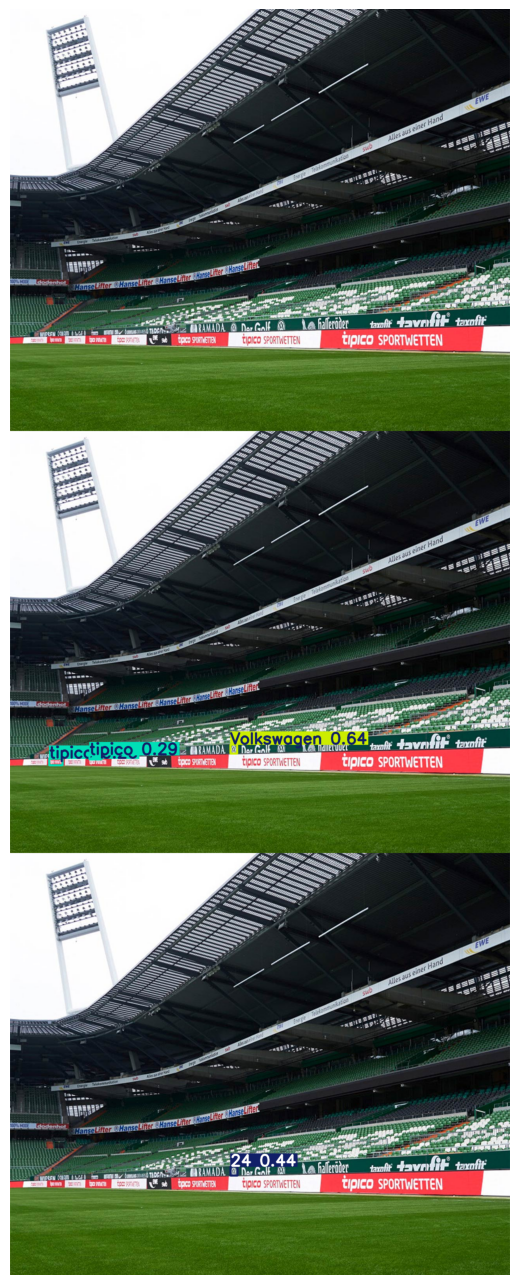

In [247]:
show_output([model_1_output.plot(), model_2_output.plot(), merged_output.plot()])